<h1> Coursera_Capstone_Project</h1>

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print('imported')

imported


In [3]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [27]:
#Importing Dataset
data_df = pd.read_csv('data//data-collisions.csv', encoding='latin-1', low_memory=False)
# data_df.shape[0]
# print(data_df.loc[0,:])
# data_df.head(10)
print(data_df.isnull().sum(axis=0))

ï»¿SEVERITYCODE         0
X                    5334
Y                    5334
OBJECTID                0
INCKEY                  0
COLDETKEY               0
REPORTNO                0
STATUS                  0
ADDRTYPE             1926
INTKEY             129603
LOCATION             2677
EXCEPTRSNCODE      109862
EXCEPTRSNDESC      189035
SEVERITYCODE            0
SEVERITYDESC            0
COLLISIONTYPE        4904
PERSONCOUNT             0
PEDCOUNT                0
PEDCYLCOUNT             0
VEHCOUNT                0
INCDATE                 0
INCDTTM                 0
JUNCTIONTYPE         6329
SDOT_COLCODE            0
SDOT_COLDESC            0
INATTENTIONIND     164868
UNDERINFL            4884
WEATHER              5081
ROADCOND             5012
LIGHTCOND            5170
PEDROWNOTGRNT      190006
SDOTCOLNUM          79737
SPEEDING           185340
ST_COLCODE             18
ST_COLDESC           4904
SEGLANEKEY              0
CROSSWALKKEY            0
HITPARKEDCAR            0
dtype: int64

In [28]:
data_df['SEVERITYDESC'].unique()

array(['Injury Collision', 'Property Damage Only Collision'], dtype=object)

In [29]:
#Check for and remove any rows with SEVERITYCODE = "0"
#Before removal get the total count of SEVERITYCODE
print("Give a run-down of the values present in the table for SEVERITYCODE:")
print(data_df["SEVERITYCODE"].value_counts())

Give a run-down of the values present in the table for SEVERITYCODE:
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64


In [30]:
#Check for and remove any rows with SEVERITYDESC = "Unknown"
#Before removal get the total count of SEVERITYDESC
print("Give a run-down of the values present in the table for SEVERITYDESC:")
print(data_df["SEVERITYDESC"].value_counts())

Give a run-down of the values present in the table for SEVERITYDESC:
Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64


In [33]:
#drop unwanted columns

# col_set = ["SEVERITYCODE", "SEVERITYDESC", "SPEEDING","ROADCOND", "WEATHER", "ROADCOND", "LIGHTCOND", "INATTENTIONIND"]
# data_df = data_df[col_set]

drop_cols = ['OBJECTID', 'COLDETKEY', 'REPORTNO', 'STATUS', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'INCDATE', 'SDOTCOLNUM', 'ST_COLCODE']

data_df_01 = data_df.drop(columns=drop_cols)

data_df_01.head()

,ï»¿SEVERITYCODE,X,Y,INCKEY,ADDRTYPE,INTKEY,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1307,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,2,Injury Collision,Angles,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,Entering at angle,0,0,N
1,1,-122.347294,47.647172,52200,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,1,Property Damage Only Collision,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,26700,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,1,Property Damage Only Collision,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,NaN,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,1144,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,1,Property Damage Only Collision,Other,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,17700,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,2,Injury Collision,Angles,2,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,NaN,Entering at angle,0,0,N


In [6]:
# Missing values
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ï»¿SEVERITYCODE  194673 non-null  int64  
 1   X                189339 non-null  float64
 2   Y                189339 non-null  float64
 3   OBJECTID         194673 non-null  int64  
 4   INCKEY           194673 non-null  int64  
 5   COLDETKEY        194673 non-null  int64  
 6   REPORTNO         194673 non-null  object 
 7   STATUS           194673 non-null  object 
 8   ADDRTYPE         192747 non-null  object 
 9   INTKEY           65070 non-null   float64
 10  LOCATION         191996 non-null  object 
 11  EXCEPTRSNCODE    84811 non-null   object 
 12  EXCEPTRSNDESC    5638 non-null    object 
 13  SEVERITYCODE     194673 non-null  int64  
 14  SEVERITYDESC     194673 non-null  object 
 15  COLLISIONTYPE    189769 non-null  object 
 16  PERSONCOUNT      194673 non-null  int6

In [7]:
data_df.columns

Index(['ï»¿SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY',
       'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [8]:
data_df['LIGHTCOND'].describe()

count       189503
unique           9
top       Daylight
freq        116137
Name: LIGHTCOND, dtype: object

In [9]:
data_df.dtypes

ï»¿SEVERITYCODE      int64
X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE         int64
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE         int64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
SEGLANEKEY           int64
CROSSWALKKEY         int64
H

In [10]:
data_df.corr()

,ï»¿SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
ï»¿SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.032604,-0.010510,0.018420
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326


In [11]:
data_df.isnull().sum()

ï»¿SEVERITYCODE         0
X                    5334
Y                    5334
OBJECTID                0
INCKEY                  0
COLDETKEY               0
REPORTNO                0
STATUS                  0
ADDRTYPE             1926
INTKEY             129603
LOCATION             2677
EXCEPTRSNCODE      109862
EXCEPTRSNDESC      189035
SEVERITYCODE            0
SEVERITYDESC            0
COLLISIONTYPE        4904
PERSONCOUNT             0
PEDCOUNT                0
PEDCYLCOUNT             0
VEHCOUNT                0
INCDATE                 0
INCDTTM                 0
JUNCTIONTYPE         6329
SDOT_COLCODE            0
SDOT_COLDESC            0
INATTENTIONIND     164868
UNDERINFL            4884
WEATHER              5081
ROADCOND             5012
LIGHTCOND            5170
PEDROWNOTGRNT      190006
SDOTCOLNUM          79737
SPEEDING           185340
ST_COLCODE             18
ST_COLDESC           4904
SEGLANEKEY              0
CROSSWALKKEY            0
HITPARKEDCAR            0
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

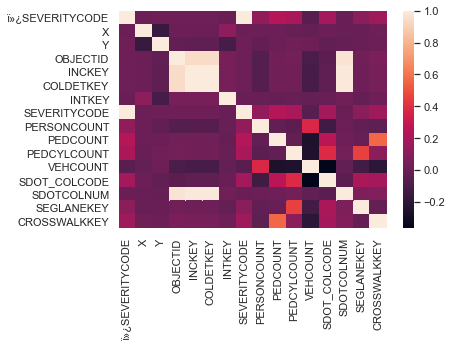

In [12]:
sb.set(style="dark")
sb.set(style="darkgrid", color_codes=True)
sb.heatmap(data_df.corr())
plt.show

In [19]:
#Importing Dataset
data_df = pd.read_csv('data//data-collisions.csv')

In [22]:
# choosing the data we will work with
col_set = ["SEVERITYCODE", "SPEEDING","ROADCOND"]
data_df = data_df[col_set]

In [23]:
# obtaining data dimensions
for feature in ["SPEEDING", "ROADCOND"]:
    print(data_df[feature].unique())

[nan 'Y']
['Wet' 'Dry' nan 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']


In [25]:
data_df['SPEEDING'] = data_df['SPEEDING'].fillna('N')


#we replace the value Nan declaring it as unknown too
data_df['ROADCOND'] = data_df['ROADCOND'].fillna('Unknown')

# checking value once again...
for feature in ["SPEEDING", "ROADCOND"]:
    print(data_df[feature].unique())

['N' 'Y']
['Wet' 'Dry' 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']


In [26]:
# We assign new values to roadcond
data_df['ROADCOND'].replace(to_replace=['Wet','Dry','Unknown','Snow/Slush','Ice','Other','Sand/Mud/Dirt','Standing Water','Oil'], value = ['Dangerous','Normal','Normal','Dangerous','Dangerous','Normal','Dangerous','Dangerous','Dangerous'], inplace=True)


In [27]:
data_df.head()

,SEVERITYCODE,SPEEDING,ROADCOND
0,2,N,Dangerous
1,1,N,Dangerous
2,1,N,Normal
3,1,N,Normal
4,2,N,Dangerous


In [28]:
data_df.shape

(194673, 3)